# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [3]:
# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print('''
================================
Beginning Weather Data Retrieval
================================
''')
weather_city_data=[]

for idx, city in enumerate(cities):
    print(f"processing record {idx} | {city}")
    base_url="http://api.openweathermap.org/data/2.5/weather"

    params={
        "q": city,
        "units": "imperial",
        "appid": weather_api_key
    }
    try:
        response = requests.get(url=base_url, params=params)
    except (ReadTimeoutError, TimeoutError, ReadTimeout):
        print("Timed out. Skipping")
    except:
        print("Unknown error. Skipping to next record.")
        
    if "404" in response.text:
        print(f"{city} not found. Skipping.")
    else:

        weather_city = response.json()
        weather_dict = {"City": city,
                        "Lat": weather_city["coord"]["lat"],
                        "Lng": weather_city["coord"]["lon"],
                        "Max Temp": weather_city["main"]["temp_max"],
                        "Humidity": weather_city["main"]["humidity"],
                        "Cloudiness": weather_city["clouds"]["all"],
                        "Wind Speed": weather_city["wind"]["speed"],
                        "Country": weather_city["sys"]["country"],
                        "Date": weather_city["dt"]
                       }
        weather_city_data.append(weather_dict)

print('''
=============================
Ending Weather Data Retrieval
=============================
''')


Beginning Weather Data Retrieval

processing record 0 | port elizabeth
processing record 1 | salalah
processing record 2 | arraial do cabo
processing record 3 | ushuaia
processing record 4 | mount pleasant
processing record 5 | de-kastri
processing record 6 | sobolevo
sobolevo not found. Skipping.
processing record 7 | bandarbeyla
processing record 8 | vardo
processing record 9 | fukuma
processing record 10 | mar del plata
processing record 11 | esperance
processing record 12 | vanavara
processing record 13 | bluff
processing record 14 | guerrero negro
processing record 15 | punta arenas
processing record 16 | malangali
processing record 17 | lasa
processing record 18 | bose
processing record 19 | luderitz
processing record 20 | rikitea
processing record 21 | lebu
processing record 22 | hermanus
processing record 23 | bredasdorp
processing record 24 | vaitupu
vaitupu not found. Skipping.
processing record 25 | touros
processing record 26 | airai
processing record 27 | tiksi
processing

In [5]:
len(weather_city_data)

574

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
weather_city_df = pd.DataFrame(weather_city_data)
weather_city_df.to_csv(output_data_file)
weather_city_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [7]:
weather_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,44.89,81,0,4.61,ZA,1627791686
1,salalah,17.0151,54.0924,77.09,100,90,5.75,OM,1627791687
2,arraial do cabo,-22.9661,-42.0278,66.40,61,100,13.44,BR,1627791687
3,ushuaia,-54.8000,-68.3000,46.06,49,40,25.32,AR,1627791687
4,mount pleasant,32.7941,-79.8626,84.97,93,40,5.01,US,1627791688


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
assert len(weather_city_df.loc[weather_city_df["Humidity"] > 100]) == 0

Student Note: there are no cities with humidity over 100%.  No further work needed.

In [57]:
# Extract relevant fields from the data frame
##### STUDENT NOTE: THERE ARE NO CITIES WITH HUMIDITY GREATER THAN 100%.  NO WORK TO DO.

# Export the City_Data into a csv
weather_city_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
from datetime import date

today = date.today()
analysis_date = today.strftime("%m/%d/%y")

## Latitude vs. Temperature Plot

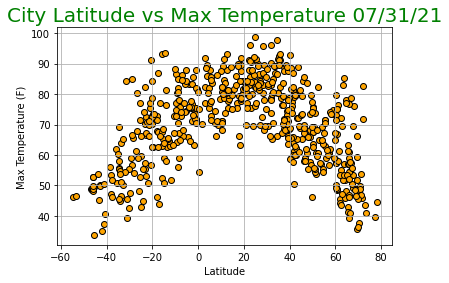

In [10]:
xvalues=weather_city_df["Lat"]
yvalues=weather_city_df["Max Temp"]
plt.scatter(x=xvalues, y=yvalues, facecolors="orange", edgecolors="black")
plt.title(f"City Latitude vs Max Temperature {analysis_date}", color="green", fontsize=20)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

Observations: The above chart demonstrates that the density of recorded temperatures increases as you move toward the equator (latitude = 0) from the poles (latitude=-90, latitude=90).  In the month of July, the earth's tilt lends more exposure in the northern hemisphere (latitude > 0) to the sun which is why the recorded temperatures are highest in the (20 < latitude < 40) band than its counterpart in the southern hemisphere.

## Latitude vs. Humidity Plot

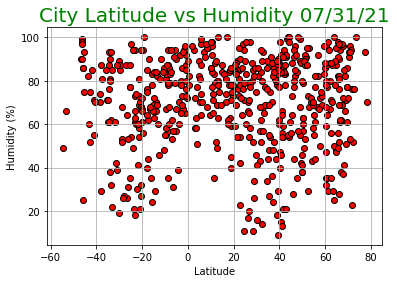

In [11]:
xvalues=weather_city_df["Lat"]
yvalues=weather_city_df["Humidity"]
plt.scatter(x=xvalues, y=yvalues, facecolors="red", edgecolors="black")
plt.title(f"City Latitude vs Humidity {analysis_date}", color="green", fontsize=20)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

Observations: In this chart we can see that most cities at the equator or shortly north have humidity levels of at least 45% with the fewest outliers.  As you proceed further north or south of the equator (< -20 or > +20 latitude) there are more uniform distributions of high and low humidity percentages.  Proximity to the equator implies greater humidity percentages.

## Latitude vs. Cloudiness Plot

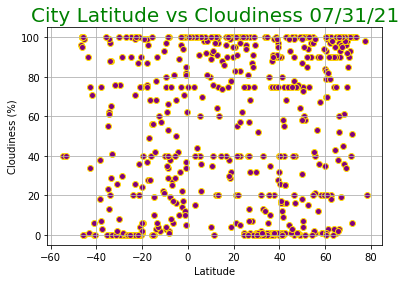

In [12]:
xvalues=weather_city_df["Lat"]
yvalues=weather_city_df["Cloudiness"]
plt.scatter(x=xvalues, y=yvalues, facecolors="purple", edgecolors="gold")
plt.title(f"City Latitude vs Cloudiness {analysis_date}", color="green", fontsize=20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

Observations: The cloudiness chart does not appear to show much correlation to the cities' distances from the equator.  We might have cities reporting their cloudiness more frequently at 0% and 100% than an actual scientific percentage.  We have comparable reports of 0% and 100% from cities at all latitudes between -55 and +65.

## Latitude vs. Wind Speed Plot

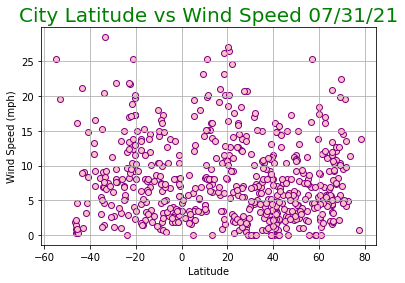

In [13]:
xvalues=weather_city_df["Lat"]
yvalues=weather_city_df["Wind Speed"]
plt.scatter(x=xvalues, y=yvalues, facecolors="pink", edgecolors="purple")
plt.title(f"City Latitude vs Wind Speed {analysis_date}", color="green", fontsize=20)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

Observations: During our snapshot on 7/31 the maximum wind speed is mostly in the 0- to 15 mph whether north or south of the equator.  Fewer cities report wind speeds > 20 mph.

## Linear Regression

In [64]:
# OPTIONAL: Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot
def plot_lr(x_values, y_values, y_label, title, x_anno, y_anno, figname):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)    # Perform linear regression
    regress_values = x_values * slope + intercept                                        # Get x/y values for linear regression linear
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    plt.scatter(x_values,y_values)
    plt.title(title, color="green", fontsize=15)
    plt.plot(x_values,regress_values,"r-")                                               # Add linear regression line to plot
    plt.annotate(line_eq,(x_anno, y_anno),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.savefig(f"output_data/{figname}.png")
    plt.show()

In [46]:
# Create Northern and Southern Hemisphere DataFrames
weather_city_N_df = weather_city_df.loc[weather_city_df["Lat"] >= 0]
weather_city_S_df = weather_city_df.loc[weather_city_df["Lat"]  < 0]
weather_city_S_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,44.89,81,0,4.61,ZA,1627791686
2,arraial do cabo,-22.9661,-42.0278,66.40,61,100,13.44,BR,1627791687
3,ushuaia,-54.8000,-68.3000,46.06,49,40,25.32,AR,1627791687
9,mar del plata,-38.0023,-57.5575,47.12,29,7,7.00,AR,1627791691
10,esperance,-33.8667,121.9000,50.83,80,97,20.40,AU,1627791692


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.45445238842213914


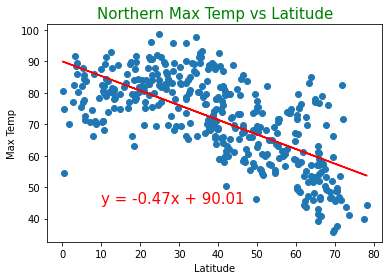

In [65]:
xvalues=weather_city_N_df["Lat"]
yvalues=weather_city_N_df["Max Temp"]
plot_lr(xvalues, yvalues, "Max Temp", "Northern Max Temp vs Latitude", 10, 45, "NMaxTemp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.47488179460957114


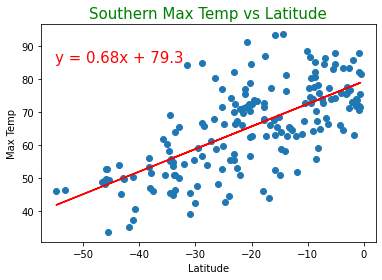

In [66]:
xvalues=weather_city_S_df["Lat"]
yvalues=weather_city_S_df["Max Temp"]
plot_lr(xvalues, yvalues, "Max Temp", "Southern Max Temp vs Latitude", -55, 85, "SMaxTemp")

Max Temp vs Latitude: In the northern hemisphere we see that there is a moderate negative correlation between max temperature and latitude while in the southern hemisphere we see a moderate positive correlation for predicting max temperature based on the latitude of the city and time of analysis.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006176141545256752


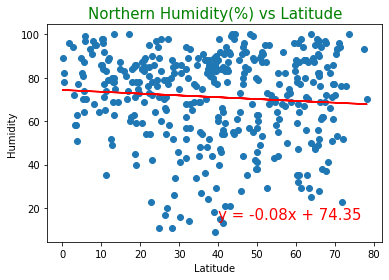

In [67]:
xvalues=weather_city_N_df["Lat"]
yvalues=weather_city_N_df["Humidity"]
plot_lr(xvalues, yvalues, "Humidity", "Northern Humidity(%) vs Latitude", 40, 15, "NHumidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006234535224846265


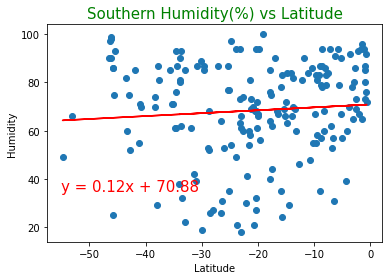

In [68]:
xvalues=weather_city_S_df["Lat"]
yvalues=weather_city_S_df["Humidity"]
plot_lr(xvalues, yvalues, "Humidity", "Southern Humidity(%) vs Latitude", -55, 35, "SHumidity")

%Humidity vs latitude: We have only slight correlations between humidity and latitude.  Almost no correlation with very low r value.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 2.1325039658915722e-05


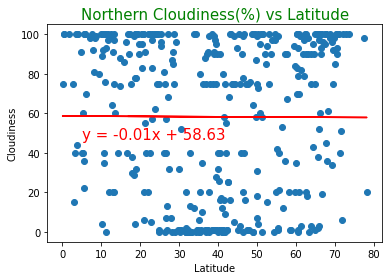

In [69]:
xvalues=weather_city_N_df["Lat"]
yvalues=weather_city_N_df["Cloudiness"]
plot_lr(xvalues, yvalues, "Cloudiness", "Northern Cloudiness(%) vs Latitude", 5, 47, "NCloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 5.265475039096751e-05


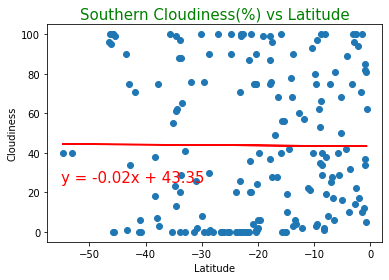

In [70]:
xvalues=weather_city_S_df["Lat"]
yvalues=weather_city_S_df["Cloudiness"]
plot_lr(xvalues, yvalues, "Cloudiness", "Southern Cloudiness(%) vs Latitude", -55, 25, "SCloudiness")

Cloudiness vs latitude: We have no correlation between cloudiness and latitude.  No correlation with very low r value.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0077151811693099105


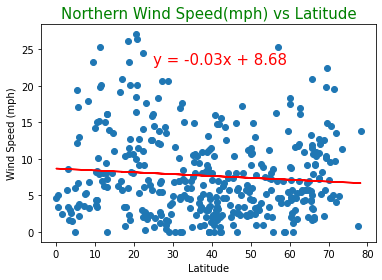

In [71]:
xvalues=weather_city_N_df["Lat"]
yvalues=weather_city_N_df["Wind Speed"]
plot_lr(xvalues, yvalues, "Wind Speed (mph)", "Northern Wind Speed(mph) vs Latitude", 25, 23, "NWindSpeed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01087218936094842


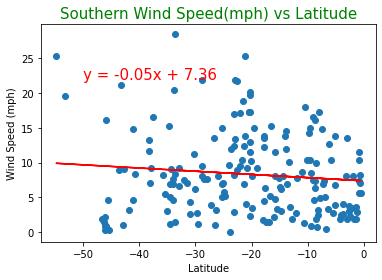

In [72]:
xvalues=weather_city_S_df["Lat"]
yvalues=weather_city_S_df["Wind Speed"]
plot_lr(xvalues, yvalues, "Wind Speed (mph)", "Southern Wind Speed(mph) vs Latitude", -50, 22, "SWindSpeed")

Wind Speed vs latitude: We have no correlations between wind speed and latitude.  No correlation with very low r value.